In [1]:
# !pip install -U scikit-learn

In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

Read the dataframe into a variable called titanic

In [3]:
titanic = pd.read_csv('data/train.csv')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Drop the 'Cabin' from the dataset. 

We'll deal with them later. The problem with Cabin is it has a lot of missing values. We will first want a fast result and maybe we can bring Cabin back later.

In [5]:
titanic.drop('Cabin', axis=1, inplace=True)

# Count the number of missing on the dataset

In [6]:
titanic.isnull().sum().sum()

179

We'll drop all the missing values for now. In this way, you will be able to compare the effects of just dropping the missing values and inputting them.

In [7]:
titanic.dropna(inplace=True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [9]:
titanic.isnull().sum().sum()

0

# Use .describe() on the resulting dataset to check some patterns on the numerical columns

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

# Check the dataset with a .head()

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

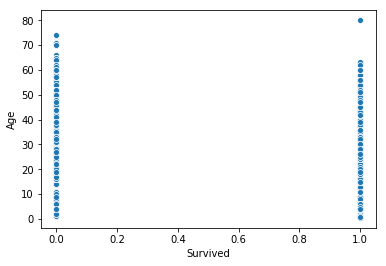

In [12]:
sns.scatterplot('Survived', 'Age', data=titanic);

Now do the same for the columns 'Fare' and 'Survived'

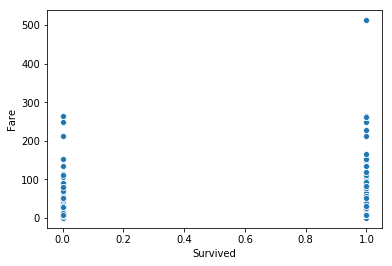

In [13]:
sns.scatterplot('Survived', 'Fare', data=titanic);

# pd.crosstab()

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the pd.crosstab() function. Use it to obtain a table using the columns 'Sex' and 'Survived'

In [14]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


Now perform the same operation for 'Pclass' and 'Survived'

In [15]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


2. Correlation Heatmap

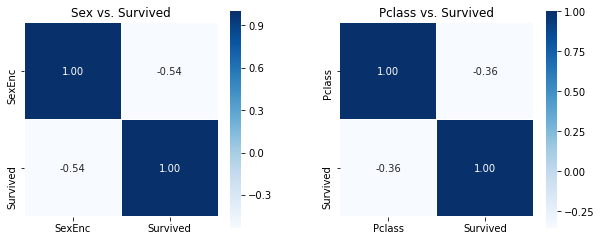

In [16]:
titanic['SexEnc'] = pd.get_dummies(titanic['Sex'], drop_first=True)
sex_survived_corr = titanic[['SexEnc', 'Survived']].corr()

pclass_survived_corr = titanic[['Pclass', 'Survived']].corr()


fig, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.heatmap(sex_survived_corr,
            cmap='Blues',
            square=True,
            cbar_kws={"shrink": .4},
            linewidths=0.1,
            annot=True,
            fmt='.2f',
            ax=ax[0])
ax[0].set_ylim(len(sex_survived_corr), 0, 0)
ax[0].set_title('Sex vs. Survived')

sns.heatmap(pclass_survived_corr,
            cmap='Blues',
            square=True,
            cbar_kws={"shrink": .4},
            linewidths=0.1,
            annot=True,
            fmt='.2f',
            ax=ax[1])
ax[1].set_ylim(len(pclass_survived_corr), 0, 0)
ax[1].set_title('Pclass vs. Survived')

plt.subplots_adjust(wspace=0.3);

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

# Plot the distribution of the Age variable for each group (Survived == 1 and Survived == 0) in the same plot. 

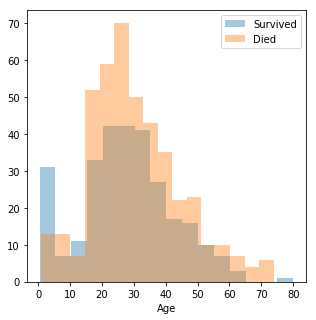

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.distplot(titanic.loc[titanic['Survived'] == 1, 'Age'], kde=False, label='Survived')

sns.distplot(titanic.loc[titanic['Survived'] == 0, 'Age'], kde=False, label='Died')

plt.legend()
plt.subplots_adjust(wspace=0.3);

# Now try to plot the same distribution, but now break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their Age distributions in the same graph.

_hint: use `titanic.query('Survived == 1 and Sex == "male" and Age < 18')` to filter the dataset for the first group_

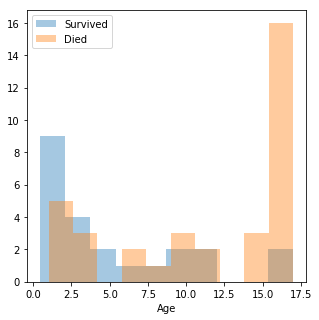

In [18]:
df_1 = titanic.query('Survived == 1 and Sex == "male" and Age < 18')
df_0 = titanic.query('Survived == 0 and Sex == "male" and Age < 18')

fig, ax = plt.subplots(figsize=(5, 5))

sns.distplot(df_1['Age'], kde=False, label='Survived', bins=10)

sns.distplot(df_0['Age'], kde=False, label='Died', bins=10)

plt.legend()
plt.subplots_adjust(wspace=0.3);

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate Age's linear correlation value? 

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the chances for each of these groups to survive. Again, filter the dataset into two subgroups:
1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their chances of surviving?

_hint: Now separate the titanic dataframe into a filter of `'Sex == "male" and Age >= 9 and Age < 18'` and calculate the mean of the Survived variable. Then do the same for the complementary group._ 

In [19]:
df_lt9 = titanic.query('Sex == "male" and Age < 9')
df_gt9 = titanic.query('Sex == "male" and Age >= 9 and Age < 18')

print('prob of survival for ages less than 9: {:.2f}%'.format(100 * df_lt9['Survived'].mean()))
print('prob of survival for ages between 9 and 18: {:.2f}%'.format(100 * df_gt9['Survived'].mean()))

prob of survival for ages less than 9: 60.71%
prob of survival for ages between 9 and 18: 20.00%


# Building our first model

### Let's start simple. 

First create a variable named X containing only the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. This will be a pandas dataframe as the one below.


In [20]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = titanic[features]
X = pd.get_dummies(X, drop_first=True)

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [21]:
y = titanic['Survived']

# Try to train the model below

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

What happened? Why didn't it work?

# Use `pd.get_dummies(X, columns=['Sex'])` on your X variable to create a new column containing the string information as a binary flag.

After using it, store it in the X variable again. You'll see that the variable Sex is gone and two other replaced it. 

In [23]:
# done

# Plot the correlation matrix and see what you can infer from the correlation between these two new columns

Do you think both are necessary? 

In [24]:
# done

If not, drop one of them. 

# Do the same analysis for the Embarked column
#### C = Cherbourg,  Q = Queenstown,  S = Southampton


In [25]:
# done

In [26]:
# done

Do you need to drop some?

# If you managed to get here. You'll be able to concat the X and y variables again with the following code. 

In [27]:
titanic_processed = pd.concat([X, y], axis=1)
titanic_processed

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,1,0
6,1,54.0,0,0,51.8625,1,0,1,0
7,3,2.0,3,1,21.0750,1,0,1,0
8,3,27.0,0,2,11.1333,0,0,1,1
9,2,14.0,1,0,30.0708,0,0,0,1
10,3,4.0,1,1,16.7000,0,0,1,1


# And store it on your own folder.

In [28]:
titanic_processed.to_csv('titanic_processed.csv', index=False)